# Analysis

## 1. Data Import & Understanding

In [32]:
# !pip install japanize-matplotlib

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For support Japanese
import japanize_matplotlib

In [34]:
# Read CSV file
df_summo = pd.read_csv("C:/Users/Owner/Documents/RealEstate Project/data/suumo_central_tokyo_cleaned.csv")
df_summo.head()

,apt_name,total Price,prefecture,city,town,line,station,way,walking time,area [m2],room,L,D,K,S,balcony [m2],date_year,date_month,age
0,ライオンズガーデン四谷津の守坂,158000000,東京,新宿,四谷三栄町,東京メトロ丸ノ内線,四谷三丁目,徒歩,6,62.48,2,1,1,1,0,6.62,2004,2,21
1,トルナーレ日本橋浜町,248000000,東京,中央,日本橋浜町３,東京メトロ半蔵門線,水天宮前,徒歩,5,78.62,3,1,1,1,0,25.53,2005,8,20
2,富久クロス コンフォートタワー,368000000,東京,新宿,富久町,東京メトロ丸ノ内線,新宿御苑前,徒歩,7,75.38,3,1,1,1,0,12.21,2015,4,10
3,パークコート千代田富士見ザ タワー,368000000,東京,千代田,富士見２,ＪＲ中央線,飯田橋,徒歩,3,64.47,2,1,1,1,0,10.89,2014,3,11
4,八丁堀東豊エステート,11800000,東京,中央,新川２-11-1,東京メトロ日比谷線,八丁堀,徒歩,2,12.78,1,0,0,0,0,1.42,1974,12,51


In [35]:
# Get the population dataset from "https://www.toukei.metro.tokyo.lg.jp/juukiy/2025/jy25000001.htm"
df_pop = pd.read_csv("C:/Users/Owner/Documents/RealEstate Project/data/jy25qv0100.csv")

df_pop = df_pop.iloc[:, [2, 4]]
# df_pop.head()

df_pop.columns = ["city", "population"]
df_pop["city"] = df_pop["city"].str.replace("区", "")
df_pop = df_pop.dropna()
df_pop.head()


,city,population
0,総数,14002534.0
1,部,9730552.0
2,千代田,68835.0
3,中央,187404.0
4,港,267780.0


In [36]:
# Combine two DataFrames
df_ori = pd.merge(df_summo, df_pop, on="city")
df_ori.head()

,apt_name,total Price,prefecture,city,town,line,station,way,walking time,area [m2],room,L,D,K,S,balcony [m2],date_year,date_month,age,population
0,ライオンズガーデン四谷津の守坂,158000000,東京,新宿,四谷三栄町,東京メトロ丸ノ内線,四谷三丁目,徒歩,6,62.48,2,1,1,1,0,6.62,2004,2,21,352717.0
1,トルナーレ日本橋浜町,248000000,東京,中央,日本橋浜町３,東京メトロ半蔵門線,水天宮前,徒歩,5,78.62,3,1,1,1,0,25.53,2005,8,20,187404.0
2,富久クロス コンフォートタワー,368000000,東京,新宿,富久町,東京メトロ丸ノ内線,新宿御苑前,徒歩,7,75.38,3,1,1,1,0,12.21,2015,4,10,352717.0
3,パークコート千代田富士見ザ タワー,368000000,東京,千代田,富士見２,ＪＲ中央線,飯田橋,徒歩,3,64.47,2,1,1,1,0,10.89,2014,3,11,68835.0
4,八丁堀東豊エステート,11800000,東京,中央,新川２-11-1,東京メトロ日比谷線,八丁堀,徒歩,2,12.78,1,0,0,0,0,1.42,1974,12,51,187404.0


In [37]:
# Check Unique Values
all_columns = df_ori.columns
for col in all_columns:
  print("\n", col, "\n", df_ori[col].unique())


 apt_name 
 ['ライオンズガーデン四谷津の守坂' 'トルナーレ日本橋浜町' '富久クロス\u3000コンフォートタワー' ... 'ベルテ代々木'
 'ブランズ渋谷代々木公園' '上原ガーデンズ']

 total Price 
 [ 158000000  248000000  368000000   11800000   17900000   19800000
   22000000   24000000   26800000   27800000   29800000   30980000
   31700000   31800000   32800000   33600000   33800000   35800000
   35900000   36500000   36800000   36990000   38800000   38960000
   39800000   39890000   39900000   39980000   39990000   40800000
   41800000   42500000   43500000   43900000   43990000   44800000
   44900000   44990000   45000000   45900000   46500000   46800000
   46900000   47000000   47800000   48800000   48990000   49800000
   49900000   49990000   51800000   52000000   52800000   52900000
   52990000   53500000   53800000   53990000   54800000   54990000
   55800000   56800000   57500000   57800000   57900000   57990000
   58800000   58990000   59770000   59800000   59980000   59990000
   60800000   62500000   62800000   62990000   63000000   64800000
   649

In [38]:
# Check the Basic Info about the dataframe
df_ori.info()

# Conver `balcony` dtype to float
df_ori["balcony [m2]"] = df_ori["balcony [m2]"].str.replace("-", "pd.Na")
df_ori["balcony [m2]"] = pd.to_numeric(df_ori["balcony [m2]"], errors='coerce')
df_ori.fillna(df_ori["balcony [m2]"].mean(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6582 entries, 0 to 6581
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   apt_name      6582 non-null   object 
 1   total Price   6582 non-null   int64  
 2   prefecture    6582 non-null   object 
 3   city          6582 non-null   object 
 4   town          6582 non-null   object 
 5   line          6582 non-null   object 
 6   station       6582 non-null   object 
 7   way           6582 non-null   object 
 8   walking time  6582 non-null   int64  
 9   area [m2]     6582 non-null   float64
 10  room          6582 non-null   int64  
 11  L             6582 non-null   int64  
 12  D             6582 non-null   int64  
 13  K             6582 non-null   int64  
 14  S             6582 non-null   int64  
 15  balcony [m2]  6582 non-null   object 
 16  date_year     6582 non-null   int64  
 17  date_month    6582 non-null   int64  
 18  age           6582 non-null 

In [39]:
# Check the basic statistic info of numeric columns
num_columns_df = df_ori.select_dtypes(include=["int", "float"])
num_columns_df.describe()

# the negative `age` is strange

,total Price,walking time,area [m2],room,L,D,K,S,balcony [m2],date_year,date_month,age,population
count,6.582000e+03,6582.000000,6582.000000,6582.000000,6582.000000,6582.000000,6582.000000,6582.000000,6582.000000,6582.000000,6582.000000,6582.000000,6582.000000
mean,1.770090e+08,5.989669,66.720579,1.883014,0.884534,0.938924,0.963689,0.104072,8.894774,1999.290641,6.358098,25.709359,250881.660893
std,1.900628e+08,3.409215,28.872845,0.778249,0.319608,0.239487,0.187077,0.305377,10.302436,17.138322,3.621991,17.138322,67541.665628
min,1.030000e+07,1.000000,12.310000,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1959.000000,1.000000,-2.000000,68835.000000
25%,6.380000e+07,3.000000,47.470000,1.000000,1.000000,1.000000,1.000000,0.000000,5.300000,1982.000000,3.000000,12.000000,231402.000000
50%,1.180000e+08,5.000000,61.950000,2.000000,1.000000,1.000000,1.000000,0.000000,7.700000,2004.000000,7.000000,21.000000,235345.000000
75%,2.048000e+08,8.000000,80.135000,2.000000,1.000000,1.000000,1.000000,0.000000,10.470000,2013.000000,10.000000,43.000000,267780.000000
max,2.180000e+09,22.000000,548.000000,11.000000,1.000000,1.000000,1.000000,1.000000,702.000000,2027.000000,12.000000,66.000000,352717.000000


In [40]:
# Check the negative `age`
df_ori[df_ori["age"] < 0].head()

,apt_name,total Price,prefecture,city,town,line,station,way,walking time,area [m2],room,L,D,K,S,balcony [m2],date_year,date_month,age,population
3606,ザ・トヨミタワー マリン＆スカイ ウエストウイング,89800000,東京,中央,豊海町,都営大江戸線,勝どき,徒歩,10,40.00,1,1,1,1,0,11.36,2026,12,-1,187404.0
3758,ザ・トヨミタワー マリン＆スカイ イーストウイング,97800000,東京,中央,豊海町,都営大江戸線,勝どき,徒歩,10,44.90,1,1,1,1,0,10.82,2026,12,-1,187404.0
4224,THE TOYOMI TOWER MARINE＆SK…,120000000,東京,中央,豊海町41,都営大江戸線,勝どき,徒歩,10,59.61,2,1,1,1,0,10.00,2026,11,-1,187404.0
4833,ザ・豊海タワー マリン＆スカイ ウエストウイング,156000000,東京,中央,豊海町,都営大江戸線,勝どき,徒歩,9,80.40,3,1,1,1,1,12.00,2027,6,-2,187404.0
5142,ザ・トヨミタワー マリン＆スカイ ウエストウイング,180000000,東京,中央,豊海町2,都営大江戸線,勝どき,徒歩,10,79.16,3,1,1,1,0,12.42,2027,6,-2,187404.0


In [41]:
# Remove them
df = df_ori[df_ori["age"] > 0]

In [42]:
# Check the basic statistic info of categorical columns
cat_columns_df = df.select_dtypes(include=["object"])
cat_columns_df.describe()

,apt_name,prefecture,city,town,line,station,way
count,6551,6551,6551,6551,6551,6551,6551
unique,2504,1,6,1225,34,145,1
top,パークタワー晴海,東京,港,晴海２,都営大江戸線,勝どき,徒歩
freq,75,6551,1955,131,1043,477,6551


In [43]:
# Create new column
df["price/m2"] = df["total Price"] / df["area [m2]"]
df.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_9116\1676968052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price/m2"] = df["total Price"] / df["area [m2]"]


,apt_name,total Price,prefecture,city,town,line,station,way,walking time,area [m2],...,L,D,K,S,balcony [m2],date_year,date_month,age,population,price/m2
0,ライオンズガーデン四谷津の守坂,158000000,東京,新宿,四谷三栄町,東京メトロ丸ノ内線,四谷三丁目,徒歩,6,62.48,...,1,1,1,0,6.62,2004,2,21,352717.0,2.528809e+06
1,トルナーレ日本橋浜町,248000000,東京,中央,日本橋浜町３,東京メトロ半蔵門線,水天宮前,徒歩,5,78.62,...,1,1,1,0,25.53,2005,8,20,187404.0,3.154414e+06
2,富久クロス コンフォートタワー,368000000,東京,新宿,富久町,東京メトロ丸ノ内線,新宿御苑前,徒歩,7,75.38,...,1,1,1,0,12.21,2015,4,10,352717.0,4.881932e+06
3,パークコート千代田富士見ザ タワー,368000000,東京,千代田,富士見２,ＪＲ中央線,飯田橋,徒歩,3,64.47,...,1,1,1,0,10.89,2014,3,11,68835.0,5.708081e+06
4,八丁堀東豊エステート,11800000,東京,中央,新川２-11-1,東京メトロ日比谷線,八丁堀,徒歩,2,12.78,...,0,0,0,0,1.42,1974,12,51,187404.0,9.233177e+05


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6551 entries, 0 to 6581
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   apt_name      6551 non-null   object 
 1   total Price   6551 non-null   int64  
 2   prefecture    6551 non-null   object 
 3   city          6551 non-null   object 
 4   town          6551 non-null   object 
 5   line          6551 non-null   object 
 6   station       6551 non-null   object 
 7   way           6551 non-null   object 
 8   walking time  6551 non-null   int64  
 9   area [m2]     6551 non-null   float64
 10  room          6551 non-null   int64  
 11  L             6551 non-null   int64  
 12  D             6551 non-null   int64  
 13  K             6551 non-null   int64  
 14  S             6551 non-null   int64  
 15  balcony [m2]  6551 non-null   float64
 16  date_year     6551 non-null   int64  
 17  date_month    6551 non-null   int64  
 18  age           6551 non-null   int

## 2. EDA

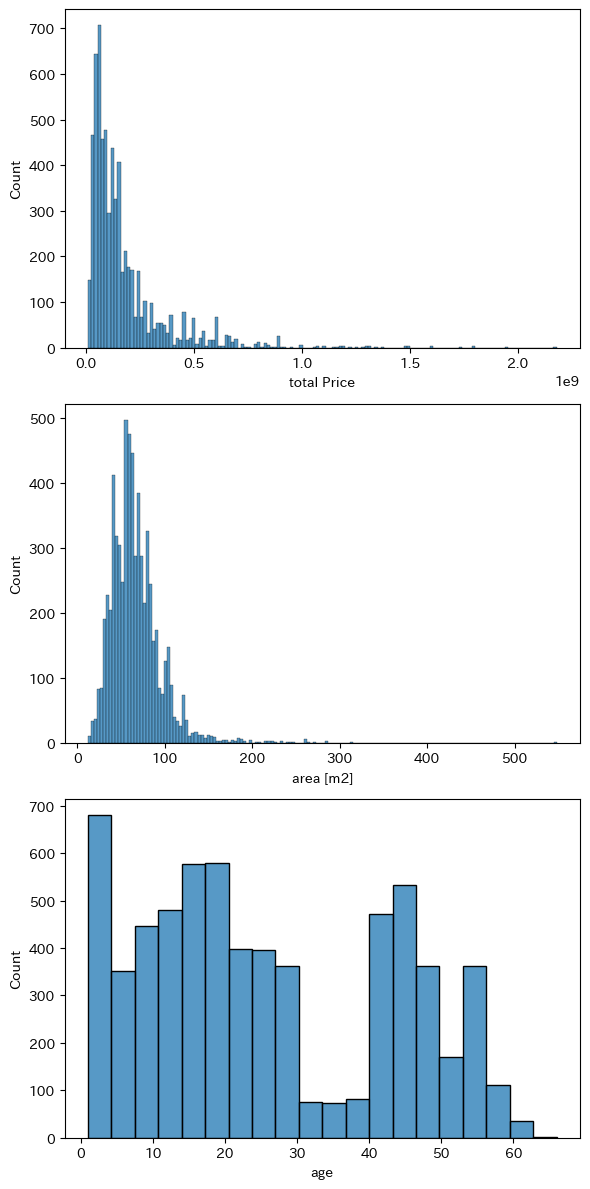

In [45]:
# Distribution of price, area, age
fig, ax = plt.subplots(3, 1, figsize=(6, 12))
sns.histplot(x="total Price", data=df, ax=ax[0]) # right skewed
sns.histplot(x="area [m2]", data=df, ax=ax[1]) # right skewed
sns.histplot(x="age", data=df, ax=ax[2]) # two peaks


plt.tight_layout()
plt.show()

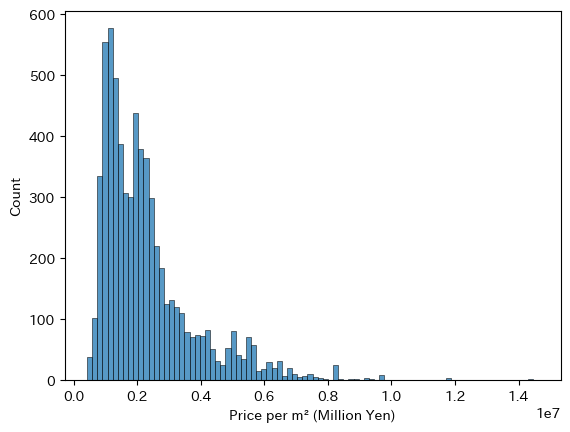

In [46]:
# Price per m^2
sns.histplot(x="price/m2", data=df)
plt.xlabel("Price per m² (Million Yen)")
plt.ylabel("Count")

plt.show()


In [47]:
# The Apartment count depending on city
apt_count = df["city"].value_counts().to_frame()
df = pd.merge(df, apt_count, on="city")
df.head()

,apt_name,total Price,prefecture,city,town,line,station,way,walking time,area [m2],...,D,K,S,balcony [m2],date_year,date_month,age,population,price/m2,count
0,ライオンズガーデン四谷津の守坂,158000000,東京,新宿,四谷三栄町,東京メトロ丸ノ内線,四谷三丁目,徒歩,6,62.48,...,1,1,0,6.62,2004,2,21,352717.0,2.528809e+06,1294
1,トルナーレ日本橋浜町,248000000,東京,中央,日本橋浜町３,東京メトロ半蔵門線,水天宮前,徒歩,5,78.62,...,1,1,0,25.53,2005,8,20,187404.0,3.154414e+06,1127
2,富久クロス コンフォートタワー,368000000,東京,新宿,富久町,東京メトロ丸ノ内線,新宿御苑前,徒歩,7,75.38,...,1,1,0,12.21,2015,4,10,352717.0,4.881932e+06,1294
3,パークコート千代田富士見ザ タワー,368000000,東京,千代田,富士見２,ＪＲ中央線,飯田橋,徒歩,3,64.47,...,1,1,0,10.89,2014,3,11,68835.0,5.708081e+06,323
4,八丁堀東豊エステート,11800000,東京,中央,新川２-11-1,東京メトロ日比谷線,八丁堀,徒歩,2,12.78,...,0,0,0,1.42,1974,12,51,187404.0,9.233177e+05,1127


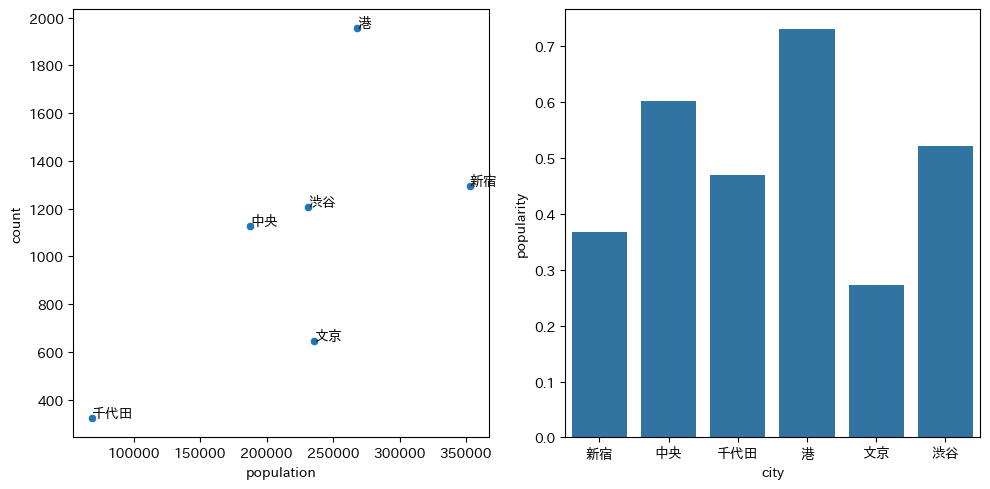

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
pop_count = df.loc[:, ["population", "count", "city"]].drop_duplicates()
sns.scatterplot(x="population", y="count", data=pop_count, ax=ax[0])
for x, y, z in zip(pop_count['population'], pop_count['count'], pop_count["city"]):
    ax[0].annotate(str(z), ( x, y+5), size=10)

df['popularity'] = df['count'] / df['population'] * 100
sns.barplot(x="city", y="popularity", data=df, ax=ax[1])

plt.tight_layout()
plt.show()

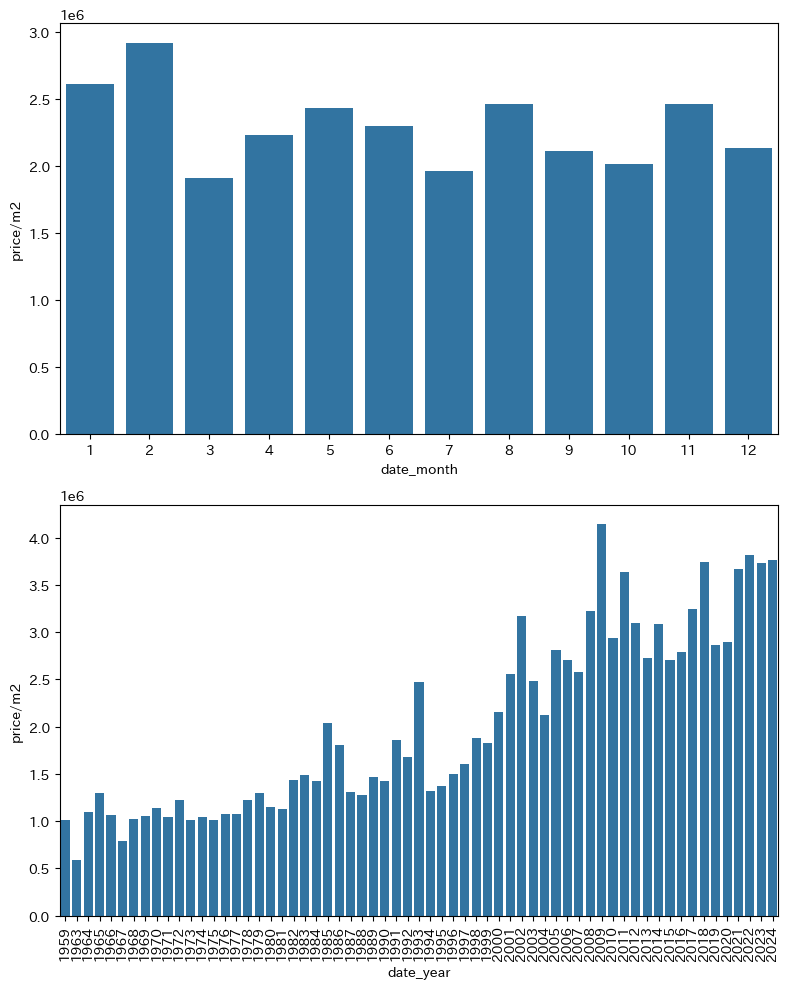

In [49]:
# Create Line plot
avg_price_month = df.groupby("date_month")["price/m2"].mean().to_frame()
avg_price_year = df.groupby("date_year")["price/m2"].mean().to_frame()

fig, ax = plt.subplots(2, 1, figsize=(8, 10))
sns.barplot(x="date_month", y="price/m2", data=avg_price_month, ax=ax[0])
sns.barplot(x="date_year", y="price/m2", data=avg_price_year, ax=ax[1])
ax[1].tick_params(axis="x", rotation=90) 

plt.tight_layout()
plt.show()


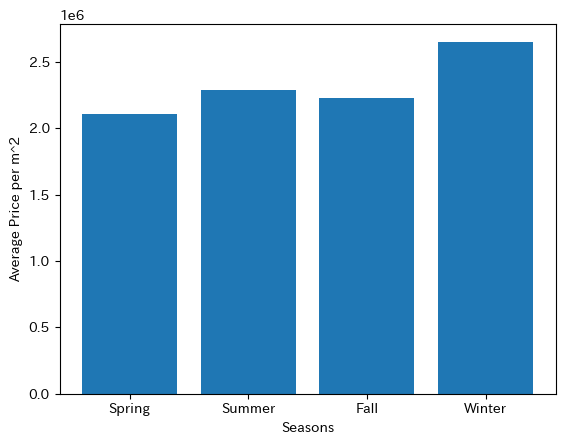

In [50]:
# Seasonally
df_spring = df[(df["date_month"] == 3) | (df["date_month"] == 4) | (df["date_month"] == 5)]
df_summer = df[(df["date_month"] == 6) | (df["date_month"] == 7) | (df["date_month"] == 8)]
df_fall = df[(df["date_month"] == 9) | (df["date_month"] == 10) | (df["date_month"] == 11)]
df_winter = df[(df["date_month"] == 12) | (df["date_month"] == 1) | (df["date_month"] == 2)]

# Calculate the average price per season
avg_spring_price = df_spring["price/m2"].mean()
avg_summer_price = df_summer["price/m2"].mean()
avg_fall_price = df_fall["price/m2"].mean()
avg_winter_price = df_winter["price/m2"].mean()

# Show the graph
seasons = ["Spring", "Summer", "Fall", "Winter"]
avg_prices_seasonality = [avg_spring_price, avg_summer_price, avg_fall_price, avg_winter_price]

plt.bar(seasons, avg_prices_seasonality)
plt.ylabel("Average Price per m^2")
plt.xlabel("Seasons")

plt.show()

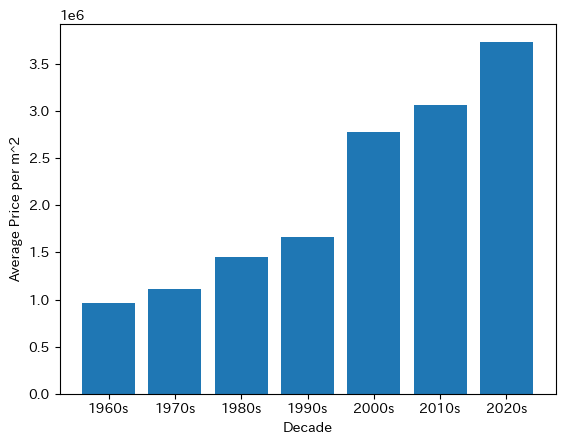

In [51]:
# Yearly
df_1960s = df[(df["date_year"] > 1959) & (df["date_year"] < 1969)]
df_1970s = df[(df["date_year"] > 1970) & (df["date_year"] < 1979)]
df_1980s = df[(df["date_year"] > 1980) & (df["date_year"] < 1989)]
df_1990s = df[(df["date_year"] > 1990) & (df["date_year"] < 1999)]
df_2000s = df[(df["date_year"] > 2000) & (df["date_year"] < 2009)]
df_2010s = df[(df["date_year"] > 2010) & (df["date_year"] < 2019)]
df_2020s = df[(df["date_year"] > 2020) & (df["date_year"] < 2025)]

# Calculate the average price per season
avg_1960s_price = df_1960s["price/m2"].mean()
avg_1970s_price = df_1970s["price/m2"].mean()
avg_1980s_price = df_1980s["price/m2"].mean()
avg_1990s_price = df_1990s["price/m2"].mean()
avg_2000s_price = df_2000s["price/m2"].mean()
avg_2010s_price = df_2010s["price/m2"].mean()
avg_2020s_price = df_2020s["price/m2"].mean()

# Show the graph
decades = ["1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020s"]
avg_prices_yearly = [avg_1960s_price, avg_1970s_price, avg_1980s_price, avg_1990s_price, avg_2000s_price, avg_2010s_price, avg_2020s_price]

plt.bar(decades, avg_prices_yearly)
plt.ylabel("Average Price per m^2")
plt.xlabel("Decade")

plt.show()

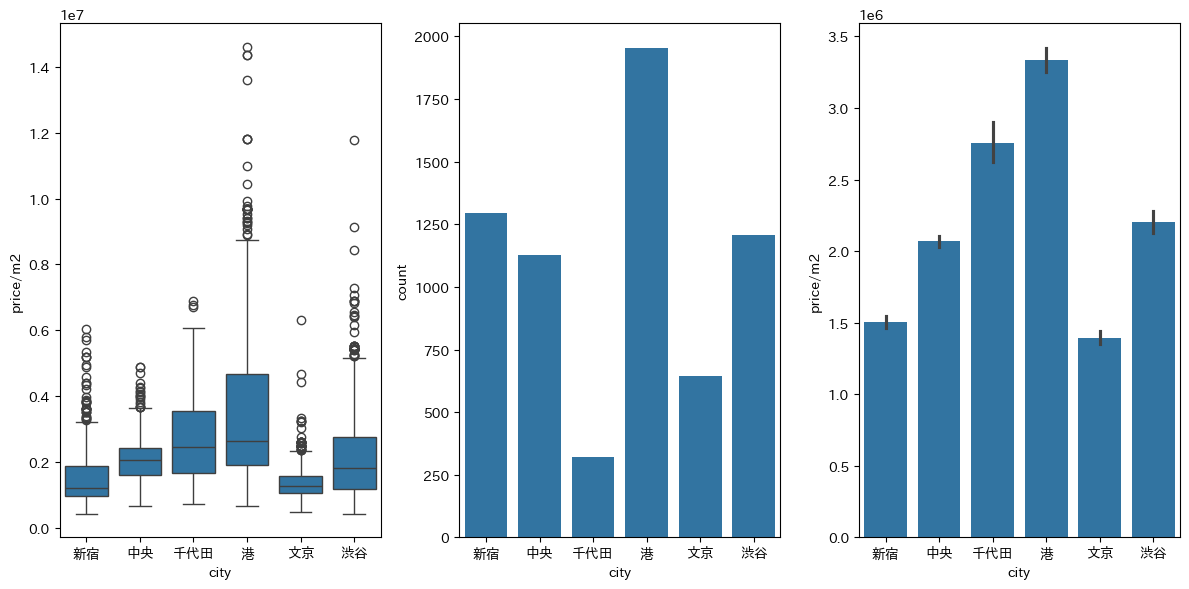

In [52]:
# The box plot for the price depending on Tokyo ward
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
sns.boxplot(x="city", y="price/m2", data=df, ax=ax[0])
sns.countplot(x="city", data=df, ax=ax[1])

avg_price_city = df.groupby("city")["price/m2"].mean().to_frame()
sns.barplot(x="city", y="price/m2", data=df, ax=ax[2])

plt.tight_layout()
plt.show()

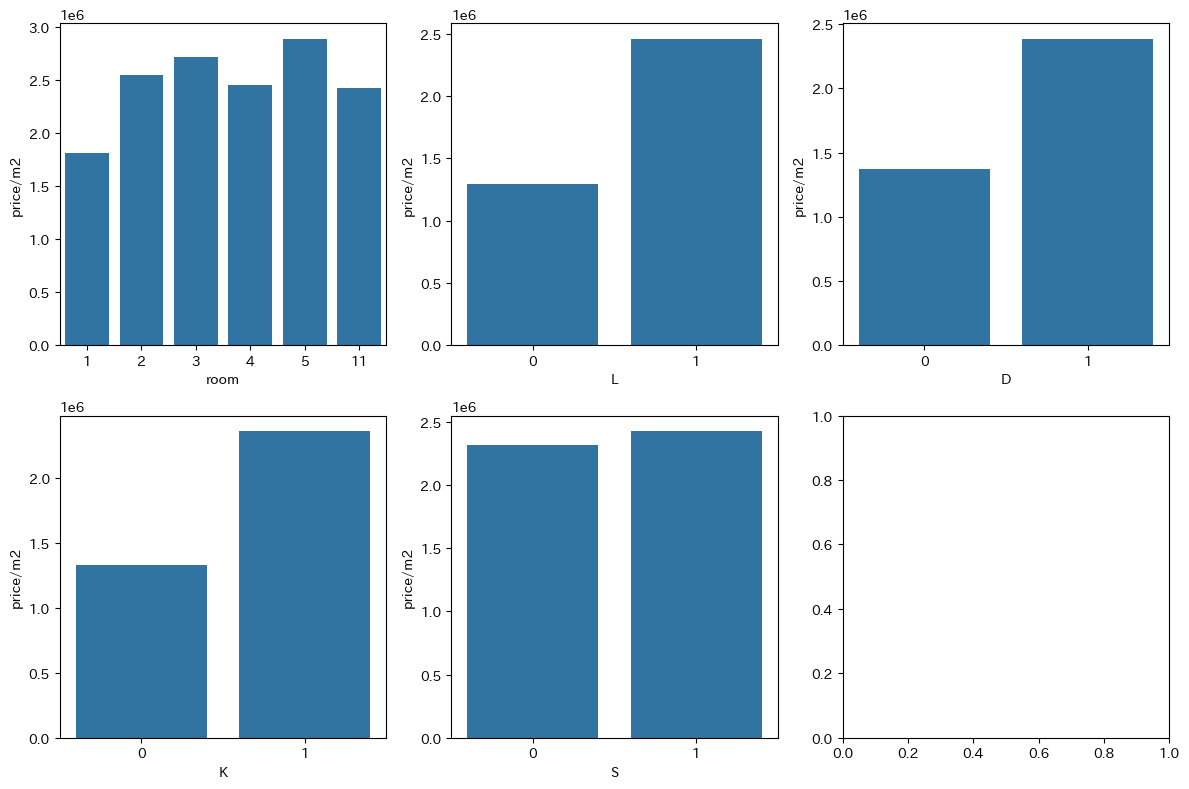

      apt_name  total Price prefecture city town   line station way  \
5454  コスモポリス品川    220000000         東京    港  港南３  ＪＲ山手線      品川  徒歩   

      walking time  area [m2]  ...  K  S  balcony [m2]  date_year  date_month  \
5454            10      90.54  ...  1  1          20.4       2005           2   

      age  population      price/m2  count  popularity  
5454   20    267780.0  2.429865e+06   1955    0.730077  

[1 rows x 23 columns]


In [53]:
# room	
avg_price_room = df.groupby("room")["price/m2"].mean().to_frame()

# L
avg_price_L = df.groupby("L")["price/m2"].mean().to_frame()

#	D	
avg_price_D = df.groupby("D")["price/m2"].mean().to_frame()

# K	
avg_price_K = df.groupby("K")["price/m2"].mean().to_frame()

# S
avg_price_S = df.groupby("S")["price/m2"].mean().to_frame()


# Show the graph
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
sns.barplot(x="room", y="price/m2", data=avg_price_room, ax=ax[0,0])
sns.barplot(x="L", y="price/m2", data=avg_price_L, ax=ax[0,1])
sns.barplot(x="D", y="price/m2", data=avg_price_D, ax=ax[0,2])
sns.barplot(x="K", y="price/m2", data=avg_price_K, ax=ax[1,0])
sns.barplot(x="S", y="price/m2", data=avg_price_S, ax=ax[1,1])

plt.tight_layout()
plt.show()


# Should I remove room 11?
print(df[df["room"] == 11])
df = df[df["room"] != 11]


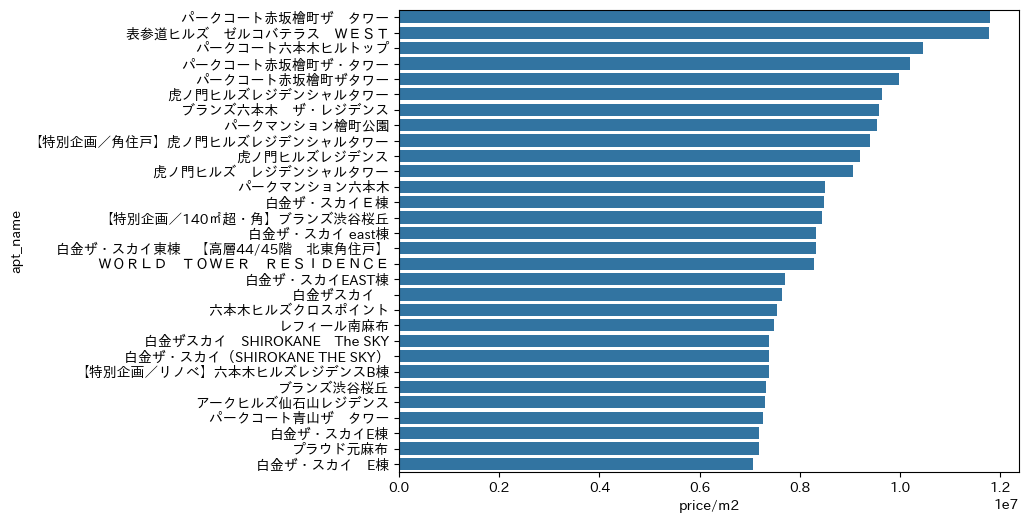

In [54]:
# Expensive Apartment top 30
plt.figure(figsize=(8, 6))
avg_price_apt = df.groupby("apt_name")["price/m2"].mean().reset_index().sort_values(by="price/m2", ascending=False)
top_50_avg_price_apt = avg_price_apt[:30]

sns.barplot(x="price/m2", y="apt_name", data=top_50_avg_price_apt)
plt.show()


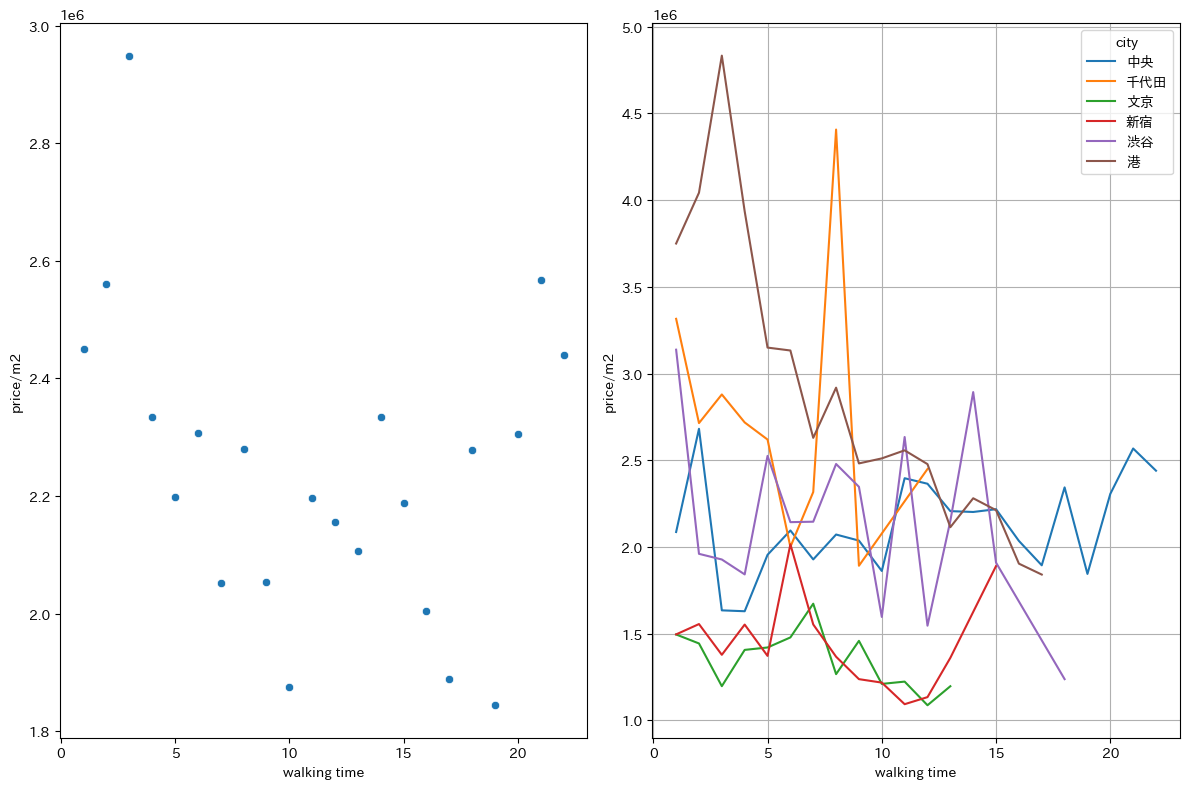

In [60]:
# walking time
avg_price_room = df.groupby(["walking time"])["price/m2"].mean().reset_index()
avg_price_room_city = df.groupby(["walking time", "city"])["price/m2"].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

# Show the graphs
sns.scatterplot(x="walking time", y="price/m2", data=avg_price_room, ax=ax[0])
sns.lineplot(x="walking time", y="price/m2", data=avg_price_room_city, hue="city",ax=ax[1])

plt.tight_layout()
plt.grid()
plt.show()

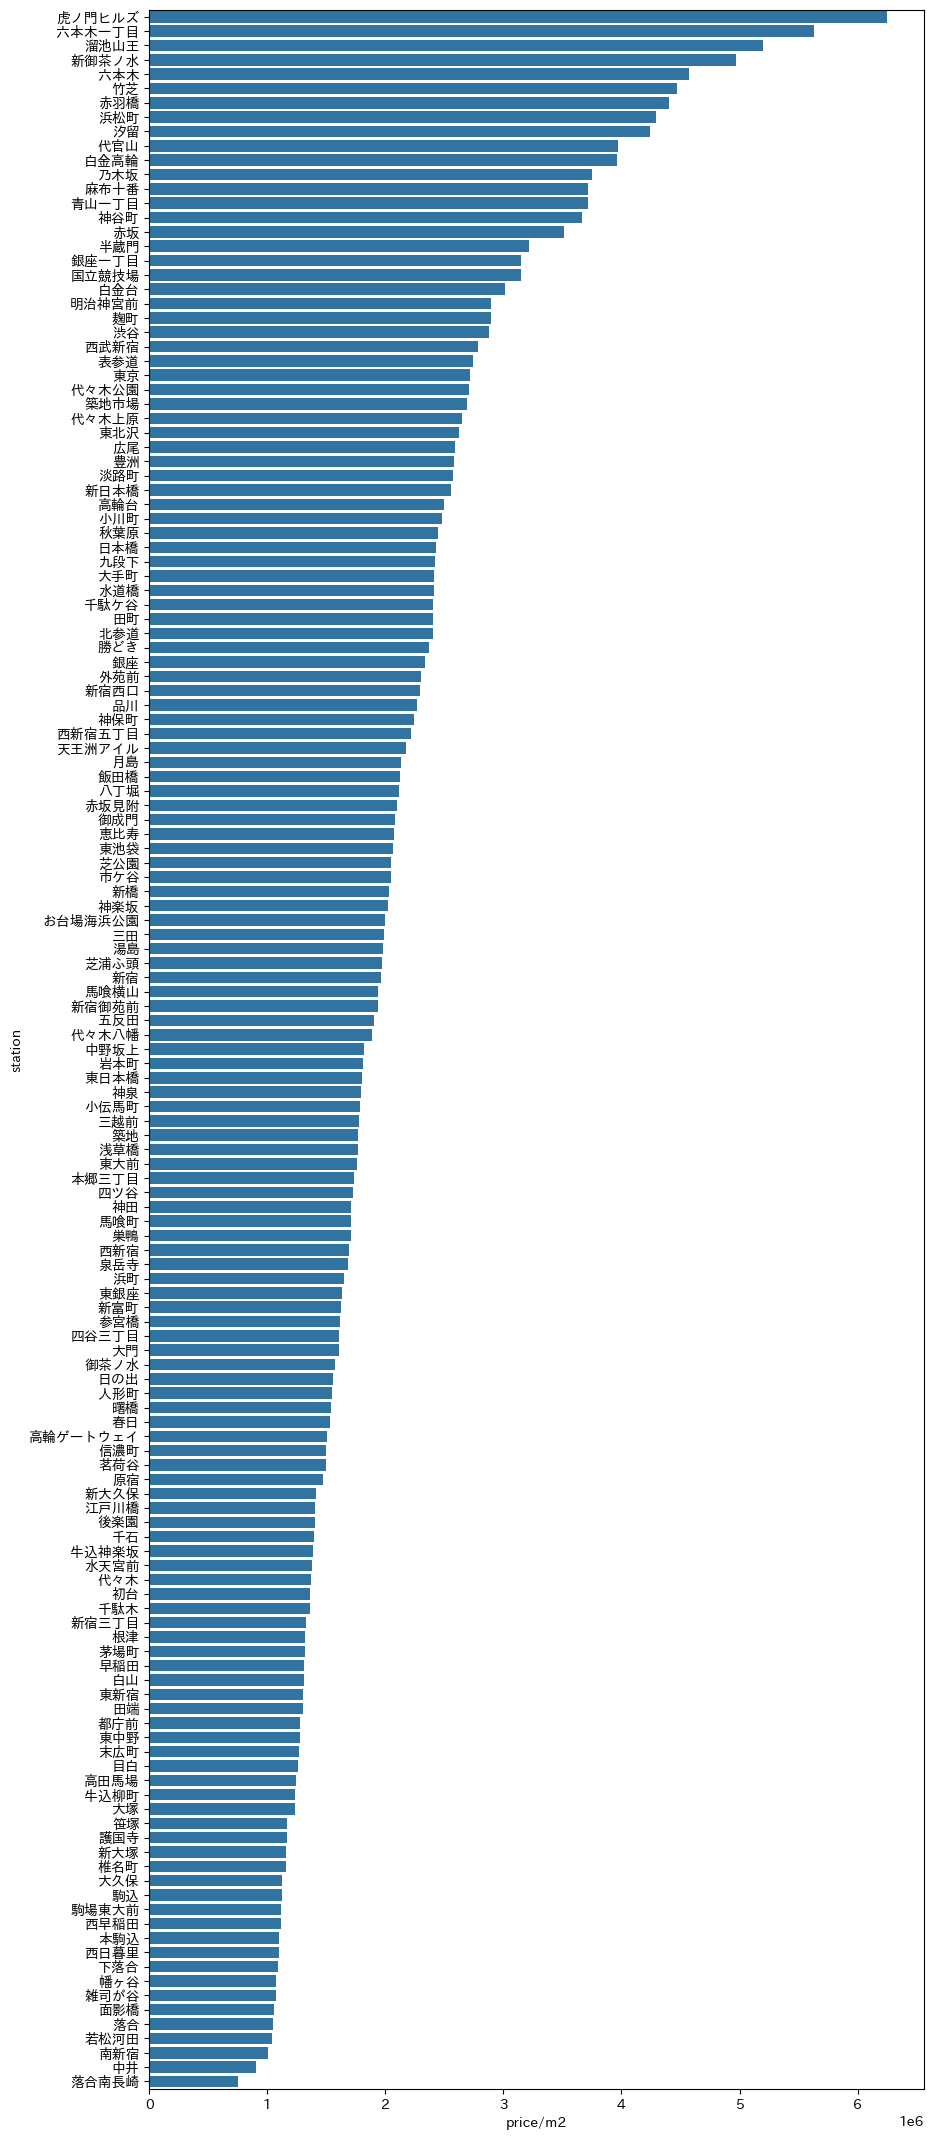

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 27))
# station
avg_price_station = df.groupby("station")["price/m2"].mean().reset_index().sort_values(by=("price/m2"), ascending=False)

sns.barplot(x="price/m2", y="station", data=avg_price_station)

plt.show()
plt.tight_layout()

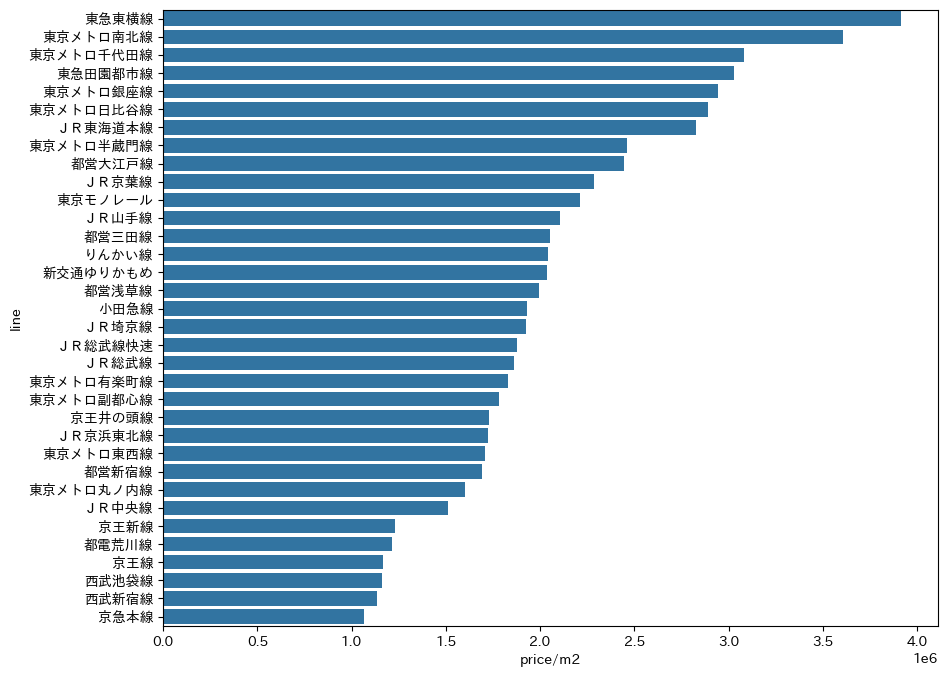

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 8))
# line
avg_price_line = df.groupby("line")["price/m2"].mean().reset_index().sort_values(by=("price/m2"), ascending=False)

sns.barplot(x="price/m2", y="line", data=avg_price_line)

plt.show()
plt.tight_layout()

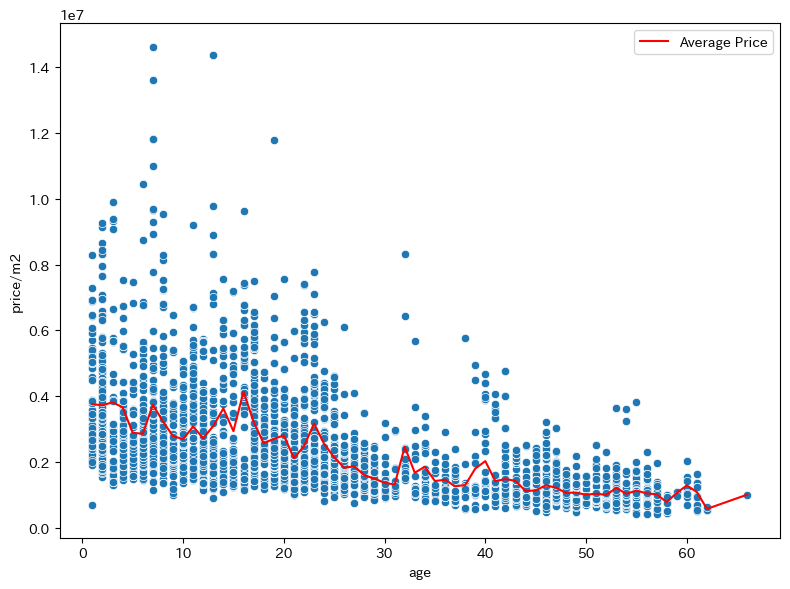

In [ ]:
# age of building
plt.figure(figsize=(8, 6))

sns.scatterplot(x="age", y="price/m2", data=df)
avg_price_age = df.groupby("age")["price/m2"].mean().reset_index()

sns.lineplot(x="age", y="price/m2", data=avg_price_age, color="red", label="Average Price")

plt.tight_layout()
plt.show()


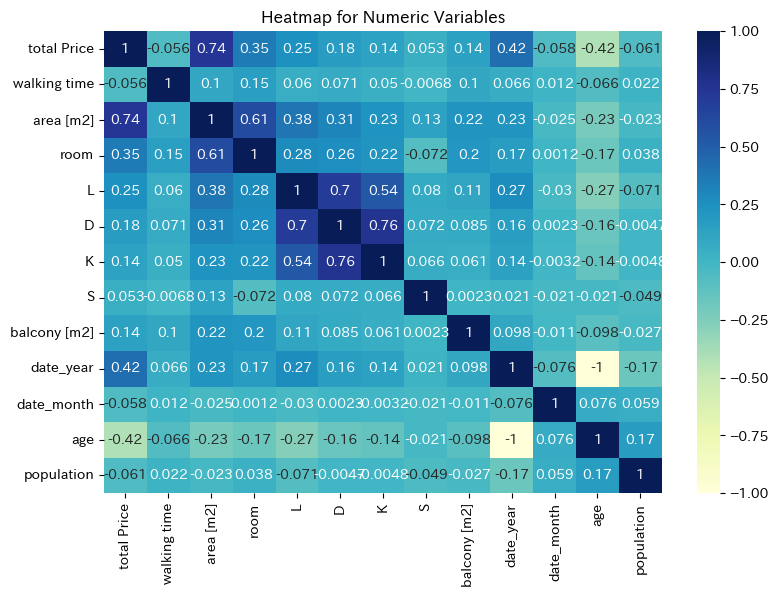

In [ ]:
# Correlation
plt.figure(figsize=(9, 6))
sns.heatmap(num_columns_df.corr(), cmap="YlGnBu", annot=True)
plt.title("Heatmap for Numeric Variables")
plt.show()

In [ ]:
# there is a strong negative correlation between date_year and diff_month, so I'll remove date_year
df = df.drop("date_year", axis=1)

In [ ]:
df.to_csv("C:/Users/Owner/Documents/RealEstate Project/data/suumo_central_tokyo_analysis.csv",encoding='utf-8-sig', index=False)